<a href="https://colab.research.google.com/github/erikamarchi/data-science-introducao-a-analise-de-series-temporais/blob/main/SeriesTemporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alucar - Analisando as vendas

In [111]:
import pandas as pd

In [112]:
alucar = pd.read_csv('alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [113]:
print('Quantidade de linhas e colunas', alucar.shape)

Quantidade de linhas e colunas (24, 2)


In [114]:
print ('Quantidade de dados nulos', alucar.isna().sum())

Quantidade de dados nulos mes       0
vendas    0
dtype: int64


In [115]:
print ('Quantidade de dados nulos', alucar.isna().sum().sum())

Quantidade de dados nulos 0


In [116]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [117]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [118]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [119]:
import seaborn as sns
from matplotlib import pyplot as plt

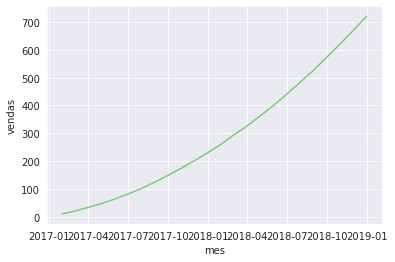

In [120]:
sns.lineplot(x='mes', y='vendas', data=alucar)

Text(0, 0.5, 'Vendas (R$)')

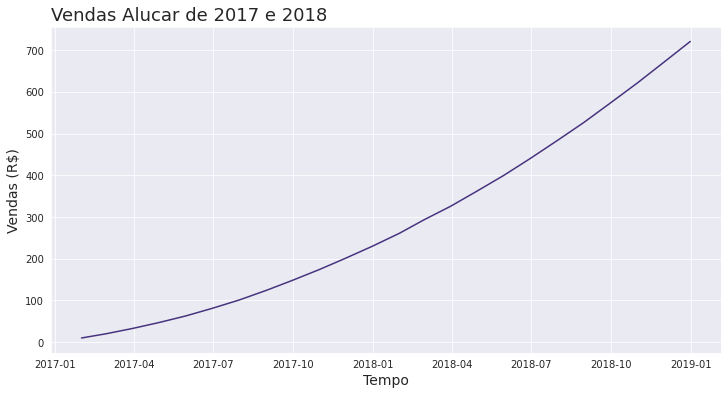

In [121]:
sns.set_palette('viridis')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)

In [122]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [123]:
alucar['aumento'] = alucar[['vendas']].diff()
alucar.head

<bound method NDFrame.head of           mes  vendas  aumento
0  2017-01-31      10      NaN
1  2017-02-28      20     10.0
2  2017-03-31      33     13.0
3  2017-04-30      47     14.0
4  2017-05-31      63     16.0
5  2017-06-30      81     18.0
6  2017-07-31     101     20.0
7  2017-08-31     124     23.0
8  2017-09-30     148     24.0
9  2017-10-31     174     26.0
10 2017-11-30     201     27.0
11 2017-12-31     230     29.0
12 2018-01-31     261     31.0
13 2018-02-28     293     32.0
14 2018-03-31     326     33.0
15 2018-04-30     362     36.0
16 2018-05-31     400     38.0
17 2018-06-30     440     40.0
18 2018-07-31     483     43.0
19 2018-08-31     527     44.0
20 2018-09-30     573     46.0
21 2018-10-31     621     48.0
22 2018-11-30     670     49.0
23 2018-12-31     721     51.0>

Text(0, 0.5, 'Aumento')

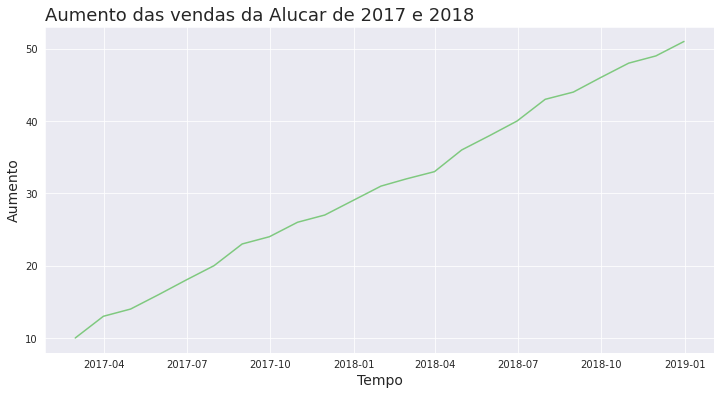

In [124]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax: ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)

In [125]:
def plotar (titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

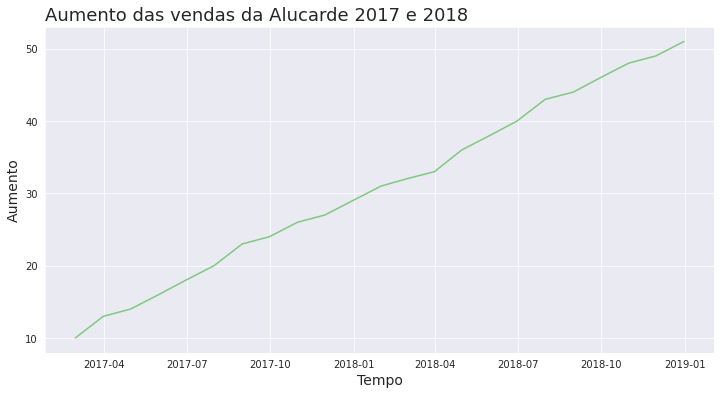

In [126]:
plotar ('Aumento das vendas da Alucarde 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [127]:
alucar['aceleracao'] = alucar['aumento'].diff()

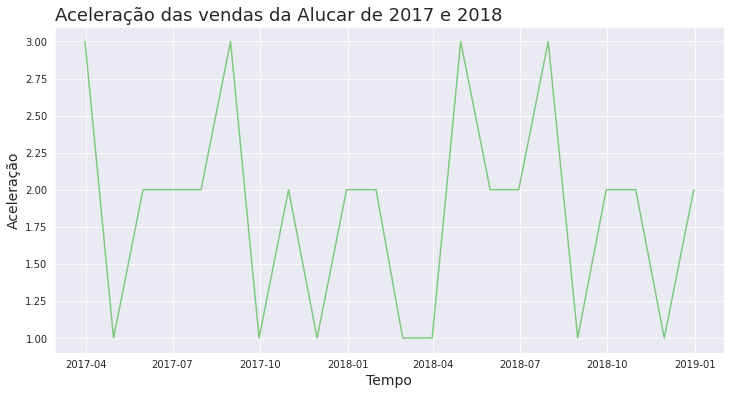

In [128]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes','aceleracao', alucar)

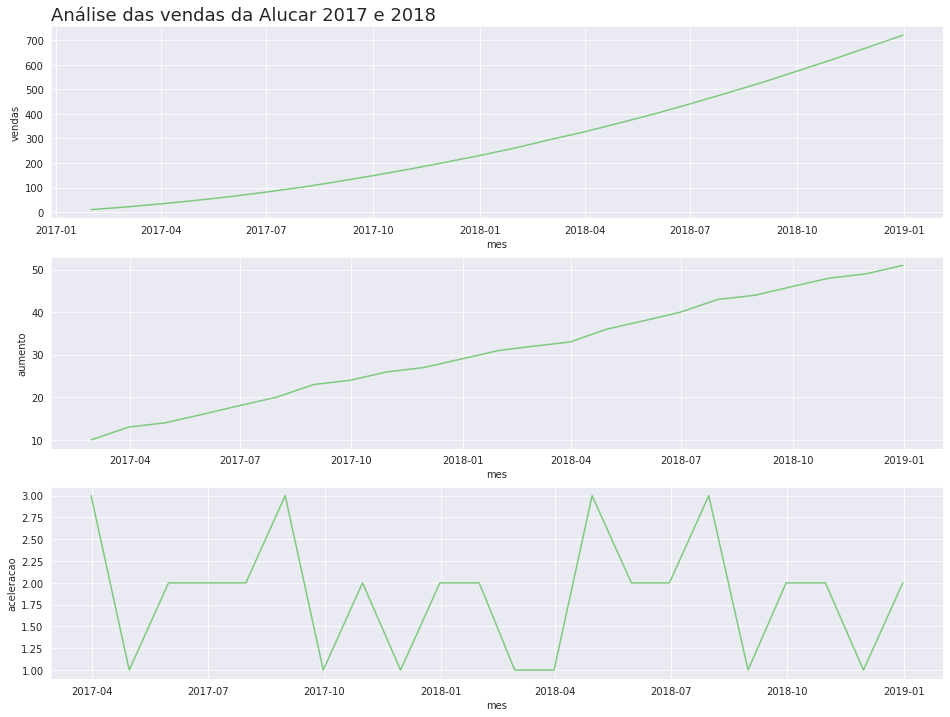

In [129]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise das vendas da Alucar 2017 e 2018',fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [130]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

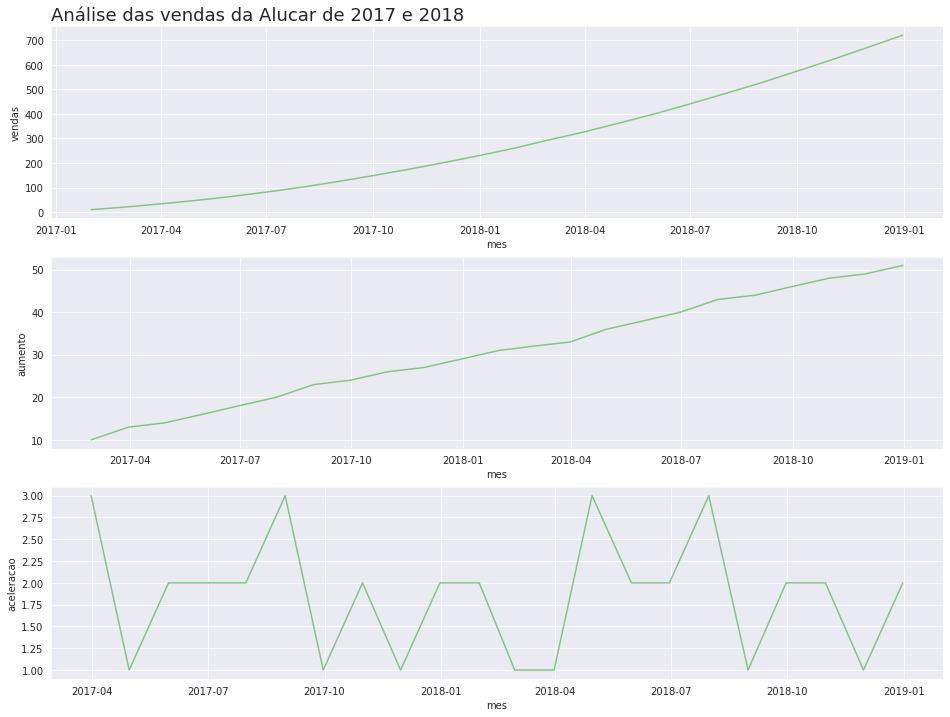

In [131]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                alucar, 'Análise das vendas da Alucar de 2017 e 2018') 

In [132]:
from pandas.plotting import autocorrelation_plot

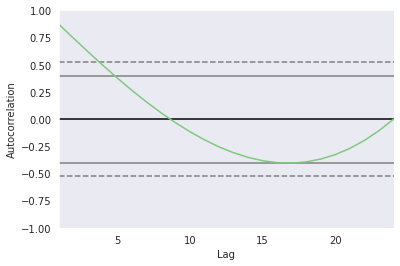

In [133]:
autocorrelation_plot(alucar['vendas']);

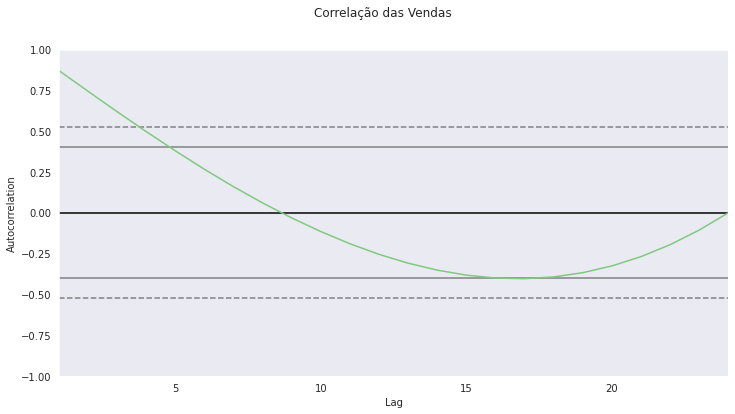

In [134]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas') 
autocorrelation_plot(alucar['vendas'])
ax=ax

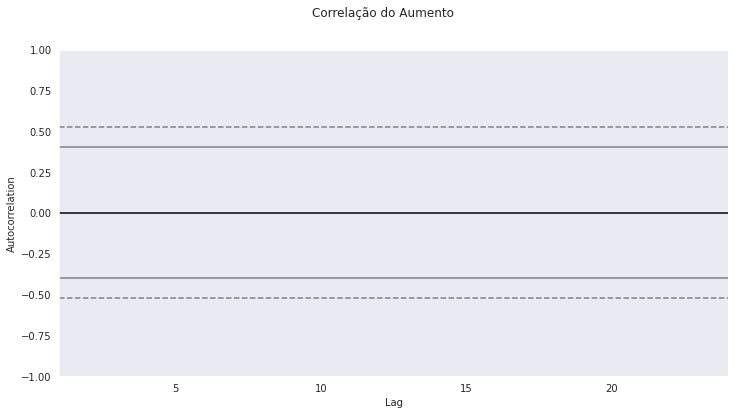

In [135]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento')
autocorrelation_plot(alucar['aumento'])
ax=ax

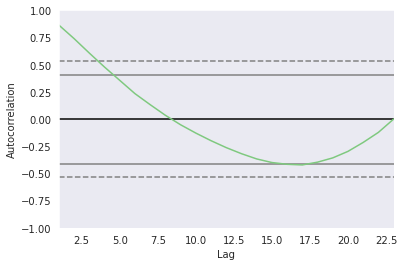

In [136]:
autocorrelation_plot(alucar['aumento'][1:])

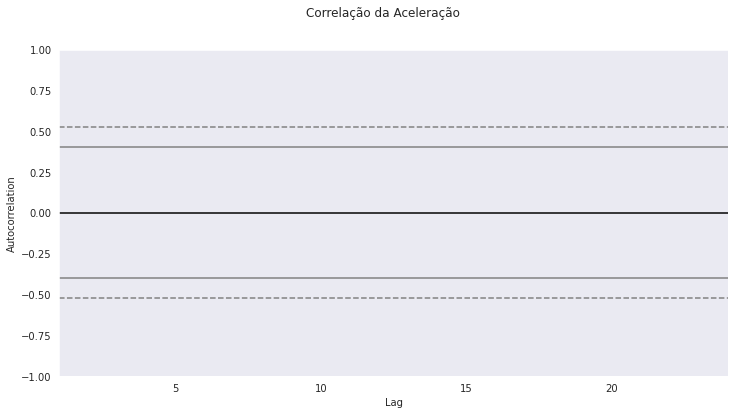

In [137]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração')
autocorrelation_plot(alucar['aceleracao'])
ax=ax

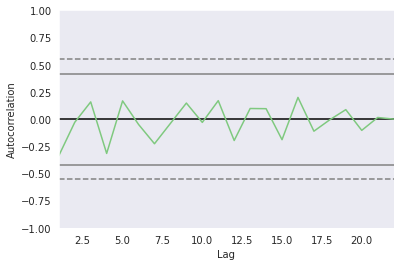

In [138]:
autocorrelation_plot(alucar['aceleracao'][2:])

#Alucar - Analisando assinantes da newsletter

In [139]:
assinantes = pd.read_csv('newsletter_alucar.csv') 
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [140]:
print('Quantidade de linhas e colunas', assinantes.shape)
print('Quantidade de dados nulos', assinantes.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [141]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [142]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [143]:
assinantes['aumento']= assinantes ['assinantes'].diff()
assinantes['aceleracao']= assinantes ['aumento'].diff()

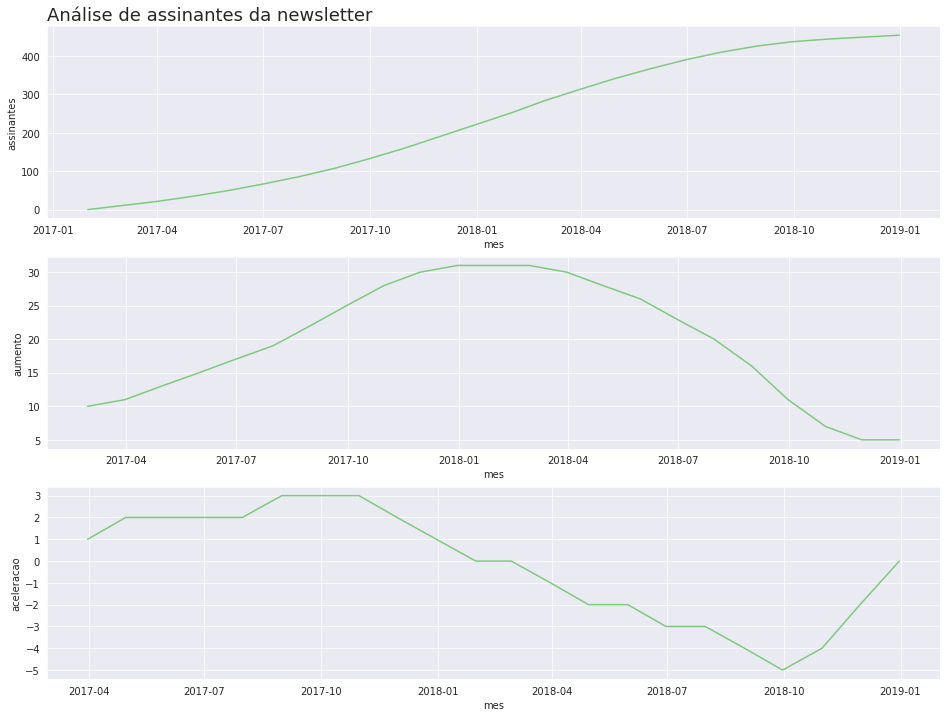

In [144]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

#Chocolura - Analisando as vendas

In [145]:
chocolura = pd. read_csv('chocolura.csv')

In [146]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [147]:
print ('Quantidade de linhas:', chocolura.shape)
print ('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


In [148]:
chocolura['aumento']= chocolura ['vendas'].diff()
chocolura['aceleracao']= chocolura ['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


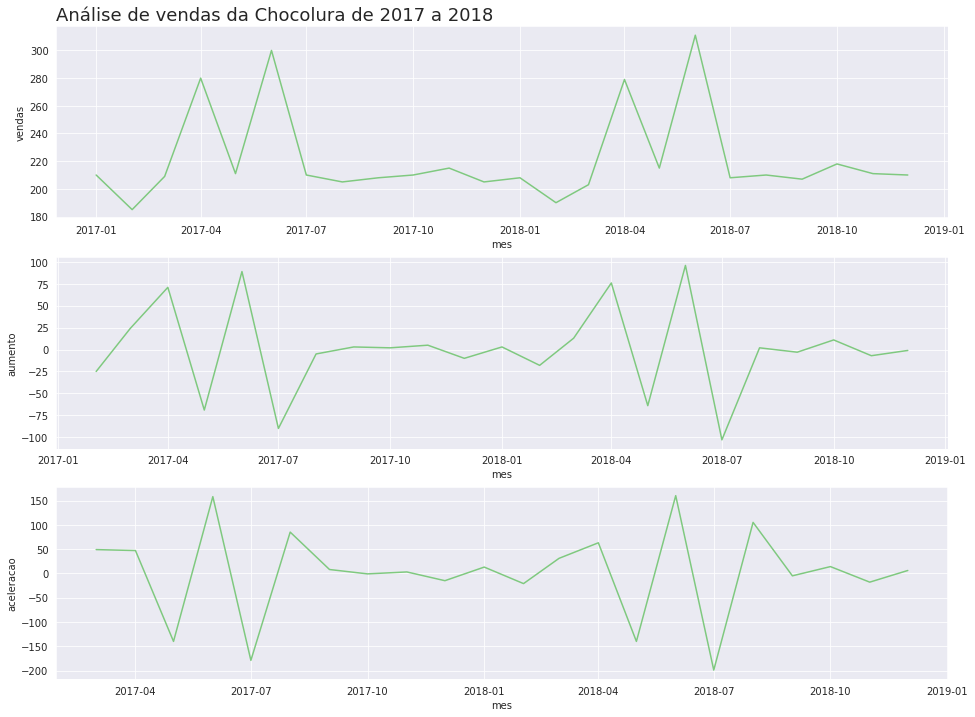

In [149]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')

#Chocolura - Vendas diárias (outubro e novembro)

In [150]:
vendas_por_dia = pd. read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [151]:
print ('Quantidade de linhas:',vendas_por_dia.shape)
print ('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas: (61, 2)
Quantidade de dados nulos: 0


In [152]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [153]:
vendas_por_dia['aumento']= vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']= vendas_por_dia ['aumento'].diff()

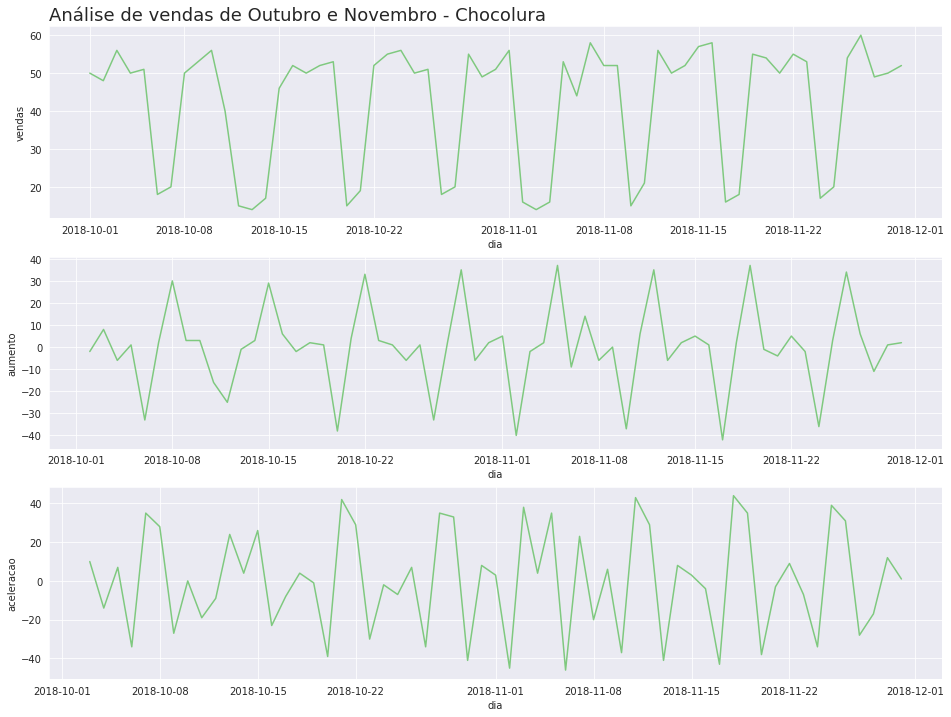

In [154]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

#Analisando a sazonalidade

In [155]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia ['dia'].dt.day_name()

In [156]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [157]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [158]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday' : 'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado', 'Sunday':'Domingo'}

In [159]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


In [160]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupadas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


#Correlação das vendas diárias

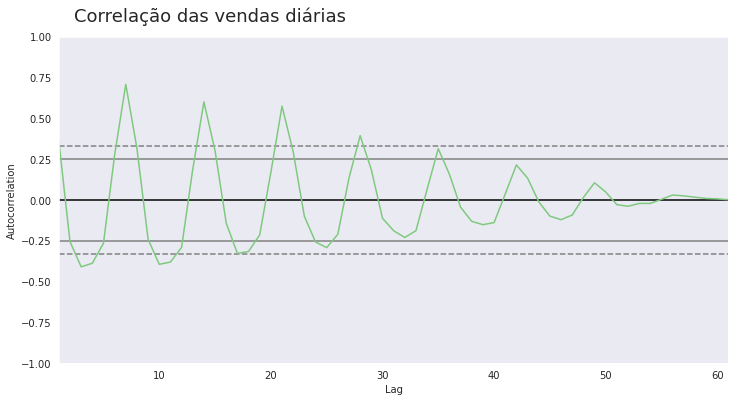

In [161]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

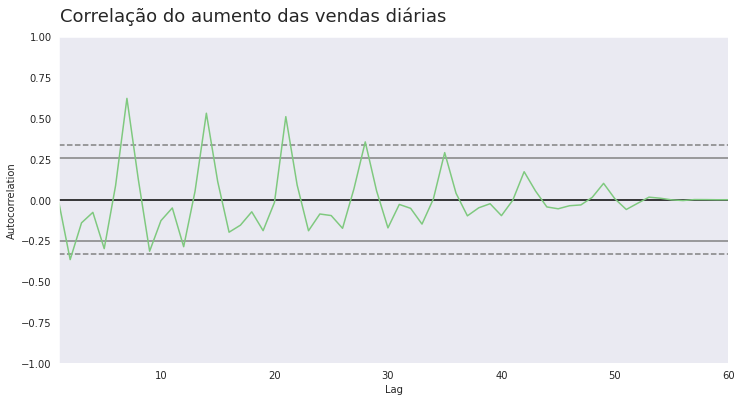

In [162]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

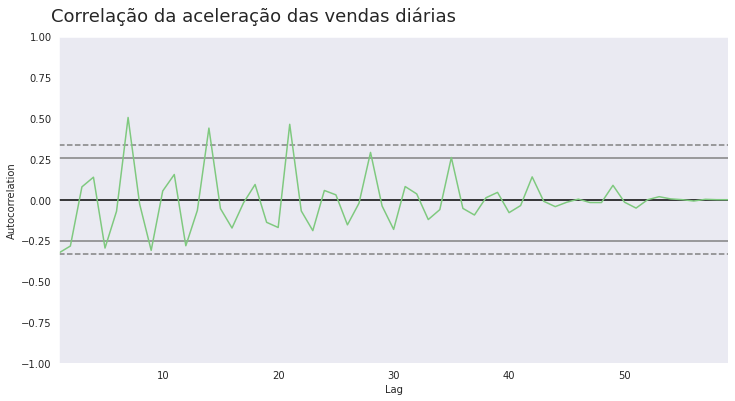

In [163]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

#Cafelura

In [164]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [165]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [166]:
cafelura['mes']= pd.to_datetime(cafelura['mes'])

In [167]:
print('Quantidade de linhas e colunas:', cafelura.shape)
print('Quantidade de dados nulos:', cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


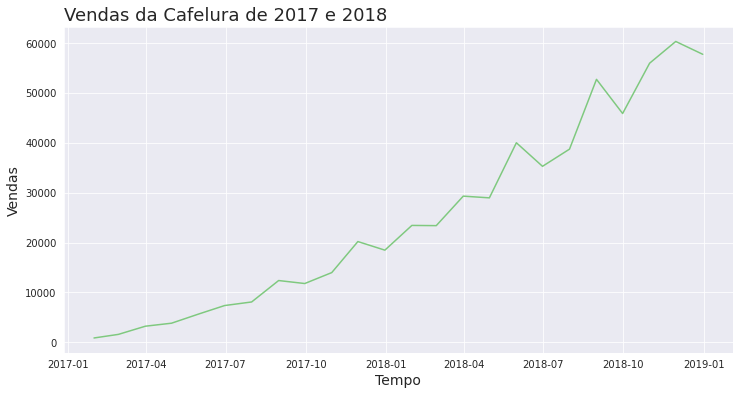

In [168]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [169]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [170]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [171]:
cafelura['vendas_normalizadas']= cafelura['vendas']/quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


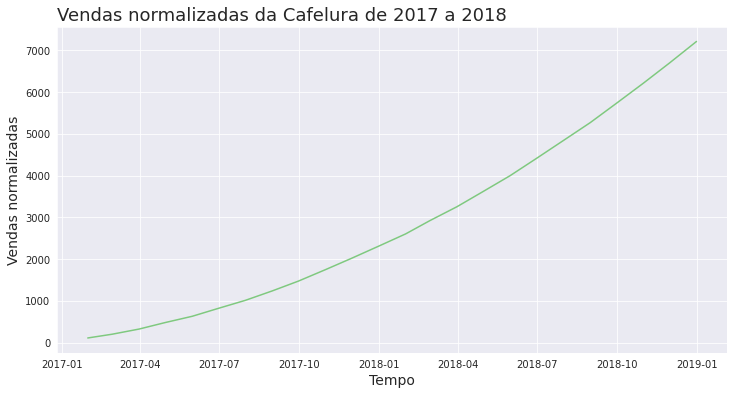

In [172]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

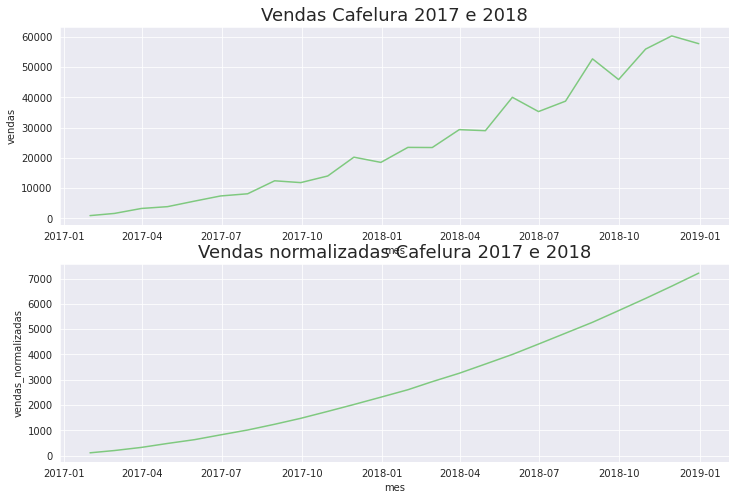

In [173]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax 

#Statsmodels

In [174]:
from statsmodels.tsa.seasonal import seasonal_decompose

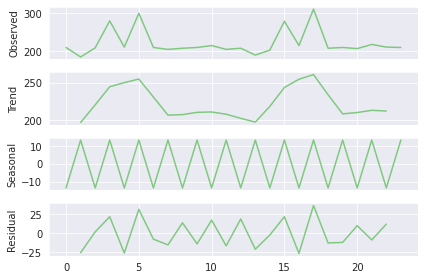

In [181]:
resultado = seasonal_decompose(chocolura['vendas'],  freq=2)
ax = resultado.plot()

In [182]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [183]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,-13.386364,NaN
1,185,197.25,13.386364,-25.636364
2,209,220.75,-13.386364,1.636364
3,280,245.00,13.386364,21.613636
4,211,250.50,-13.386364,-26.113636


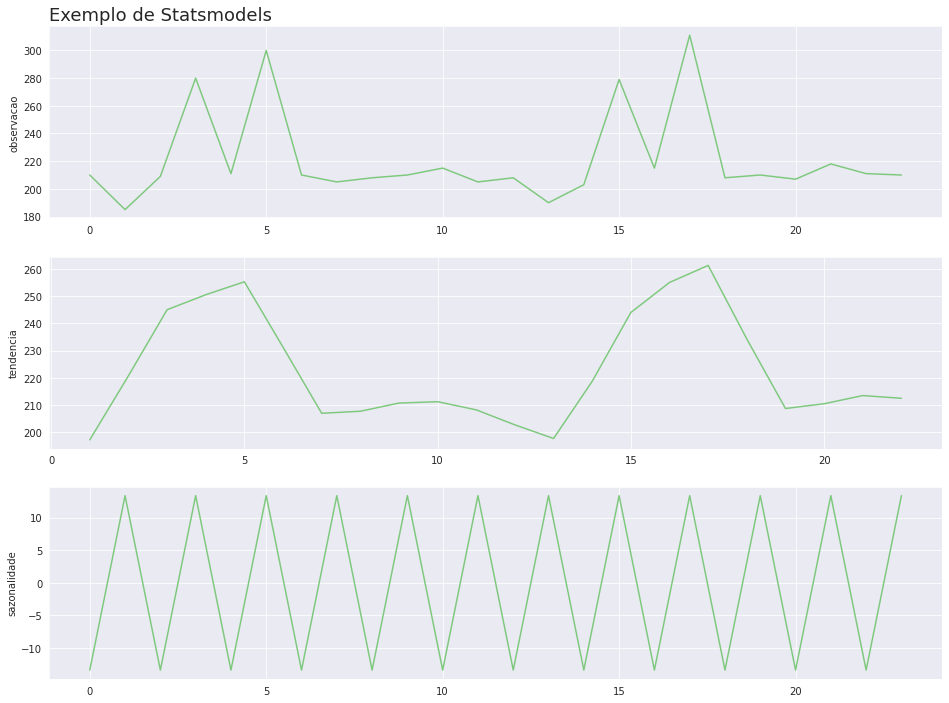

In [184]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

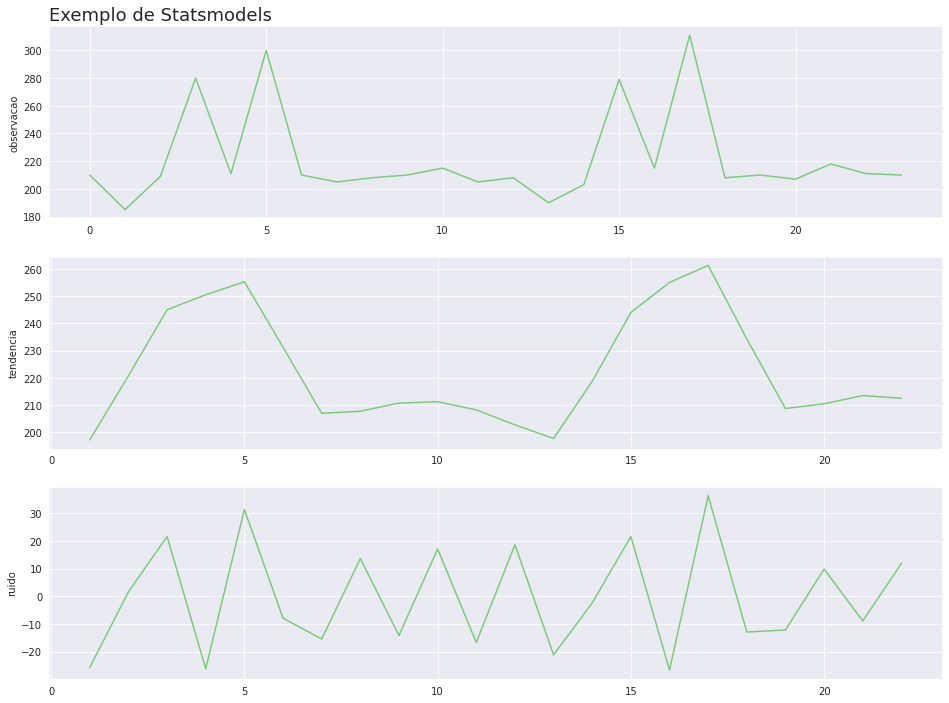

In [185]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado, 'Exemplo de Statsmodels')

#Alucel - Análise de vendas

In [186]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [187]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [188]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [189]:
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()

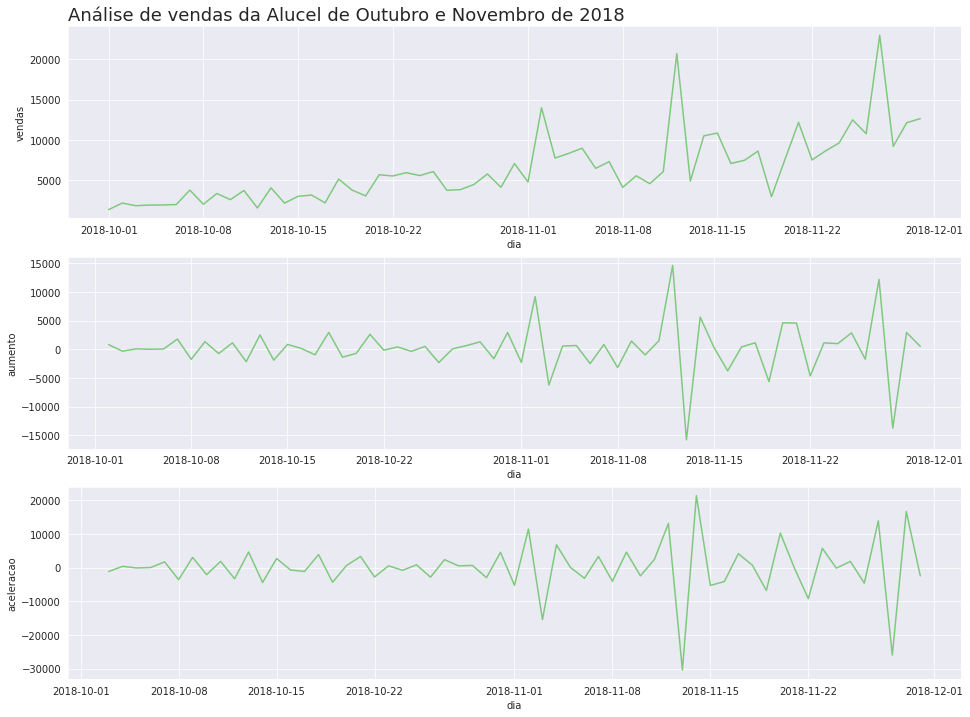

In [190]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')